###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [2]:
import pandas as pd
df1= pd.read_csv("college_1.csv")
df2= pd.read_csv("college_2.csv")

In [51]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               84 non-null     object 
 1   python             84 non-null     float64
 2   mysql              84 non-null     float64
 3   Previous Geekions  84 non-null     int64  
 4   CodeKata Score     84 non-null     int64  
 5   Department         84 non-null     object 
 6   Rising             84 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    35 non-null     object
 1   python                  35 non-null     int64 
 2   python_en               35 non-null     int64 
 3   mysql                   35 non-n

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [5]:
res = pd.concat([df1,df2],axis=0,ignore_index=True)
res

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [43]:
a=res[(res['CodeKata Score']>15000)]
a.to_csv("Exceeded expectations")

###### if  10000 < codekata score < 15000   (Reached_expectations.csv)



In [42]:
b=res[(res['CodeKata Score']<15000) & (res['CodeKata Score']>10000)]
b.to_csv("Reached_expectations")

###### if  7000 < codekata score < 10000   (Needs_Improvement.csv)


In [41]:
c=res[(res['CodeKata Score']<10000) & (res['CodeKata Score']>7000)]
c.to_csv("Needs_Improvement")

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [40]:
d=res[(res['CodeKata Score']<7000)]
d.to_csv("Unsatisfactory")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [47]:
Average =pd.Series(res[["Previous Geekions","CodeKata Score"]].mean(axis=1))
Average

0      24500.0
1      21740.0
2      19680.0
3      10610.0
4       8980.0
        ...   
114     2380.0
115     1890.0
116     1720.0
117        0.0
118        0.0
Length: 119, dtype: float64

###### No of students participated 

In [200]:
len(res["Name"].unique())

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [59]:
import numpy as np       #Here we not considering null or negative values
res[["python","mysql","python_en","computational_thinking"]].replace([0.0,-1.0],np.nan).mean(axis=0,skipna=True)

python                    78.253012
mysql                     40.557971
python_en                 45.260870
computational_thinking    10.500000
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

###### Method 1

In [121]:
res[["Name","Rising"]].iloc[res["Rising"].sort_values(ascending=False).head(3).index]

,Name,Rising
92,shifak N,3140
102,Narasimhan Y L,2000
86,Ganesh Ramkumar R,2000


###### Method 2

In [206]:
res.sort_values('Rising',ascending=False)[["Name","Rising"]].head(3)

,Name,Rising
92,shifak N,3140
102,Narasimhan Y L,2000
86,Ganesh Ramkumar R,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [126]:
res[["Name","CodeKata Score"]].iloc[res["CodeKata Score"].sort_values(ascending=False).head(3).index]

,Name,CodeKata Score
0,A.Dharani,24500
1,V.JEEVITHA,21740
2,HEMAVATHI.R,19680


###### Department wise codekata performence (pie chart)

###### Method 1: Using only Pandas ploting methods

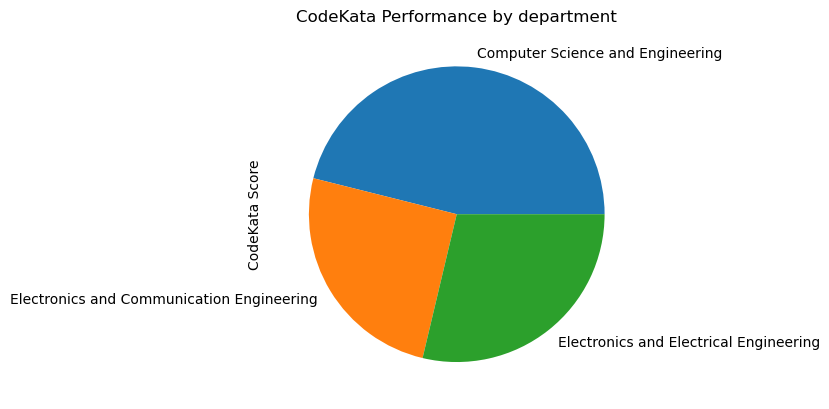

In [194]:
res.groupby("Department")["CodeKata Score"].mean().plot(kind="pie",title="CodeKata Performance by department");

###### Method 2: Using MatPlot methods

In [181]:
import matplotlib.pyplot as plt
res.groupby("Department")["CodeKata Score"].mean()

Department
Computer Science and Engineering             5079.761905
Electronics and Communication Engineering    2777.820513
Electronics and Electrical Engineering       3164.705882
Name: CodeKata Score, dtype: float64

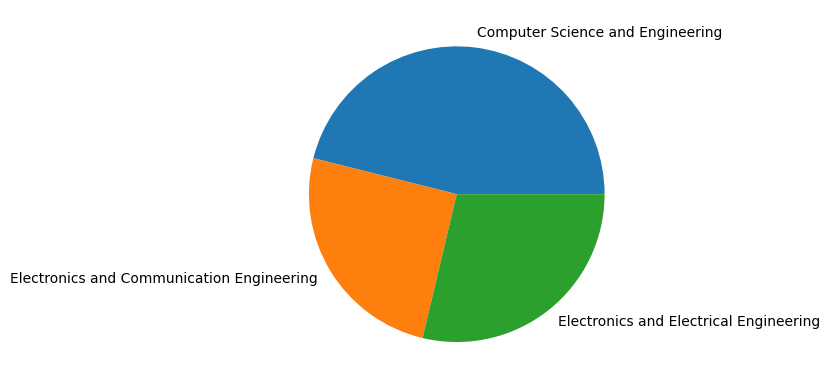

In [185]:
import matplotlib.pyplot as plt
a=res.groupby("Department")["CodeKata Score"].mean()
department=["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering"]
plt.pie(a,labels=department)
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

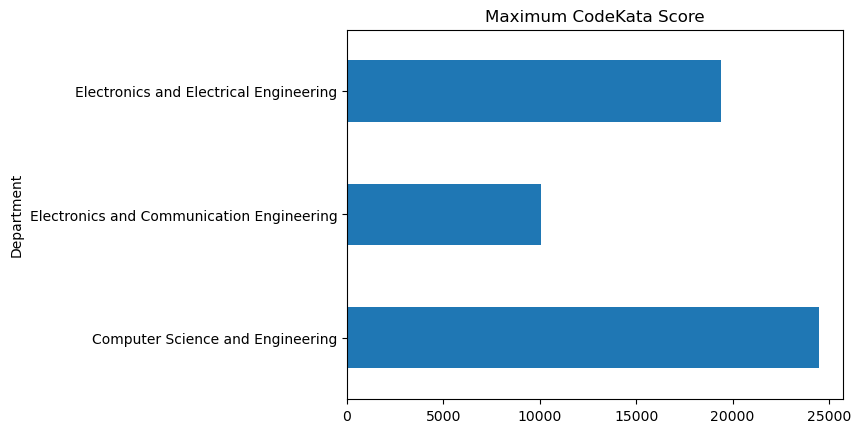

In [202]:
res.groupby("Department")["CodeKata Score"].max().plot(kind="barh",title="Maximum CodeKata Score");